<img src="data\overfit.png" alt="Hình minh họa" style="display: block; margin: 0 auto;">


# Regularized Method for Regression

Ví dụ:

* [Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [Least Absolute Shrinkage and Selection Operator (LASSO)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

## Ridge Regression
Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Ridge Regression giải quyết một số vấn đề của **Bình phương tối thiểu thông thường** bằng cách áp dụng hình phạt đối với kích thước của các hệ số. Các hệ số Ridge giảm thiểu tổng bình phương dư bị phạt,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

$\alpha>=0$ là một tham số phức tạp kiểm soát mức độ co rút: giá trị của $\alpha$ càng lớn thì mức độ co rút càng lớn và do đó các hệ số trở nên mạnh mẽ hơn đối với hiện tượng cộng tuyến.

Ridge Regression là một mô hình bị phạt L2. Cộng tổng bình phương của các trọng số vào hàm giá bình phương nhỏ nhất.

***

Cho thấy ảnh hưởng của sự cộng tuyến trong các hệ số của công cụ ước tính.

Ridge Regression là công cụ ước tính được sử dụng trong ví dụ này. Mỗi màu đại diện cho một đặc điểm khác nhau của vectơ hệ số và điều này được hiển thị dưới dạng hàm của tham số chính quy.

Ví dụ này cũng cho thấy tính hữu ích của việc áp dụng hồi quy Ridge cho các ma trận có điều kiện kém. Đối với những ma trận như vậy, một sự thay đổi nhỏ trong biến mục tiêu có thể gây ra sự chênh lệch lớn về trọng số tính toán. Trong những trường hợp như vậy, sẽ rất hữu ích nếu đặt một mức chính quy hóa (alpha) nhất định để giảm sự biến đổi này (nhiễu).

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [29]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.26.0
2.0.3
3.9.18 | packaged by conda-forge | (main, Aug 30 2023, 03:40:31) [MSC v.1929 64 bit (AMD64)]
1.3.0


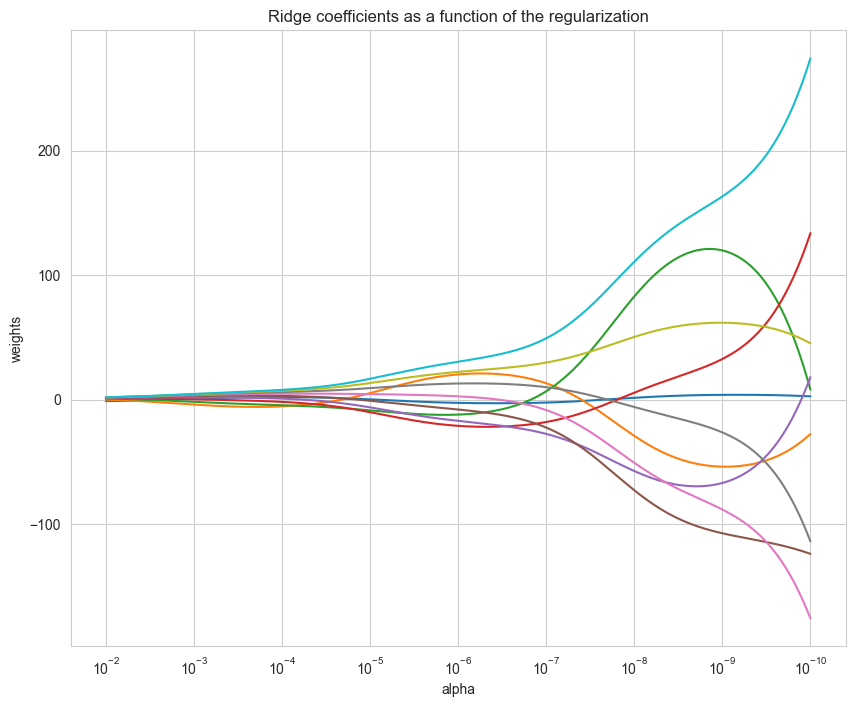

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# ###########################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# ###########################################################################
# Display results

plt.figure(figsize=(10,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## LASSO Regression

Một mô hình tuyến tính ước tính các hệ số thưa thớt.

Về mặt toán học, nó bao gồm một mô hình tuyến tính được đào tạo với $\ell_1$ trước đó làm bộ điều chỉnh. Hàm mục tiêu cần giảm thiểu là:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

Do đó, ước tính Lasso giải quyết việc giảm thiểu hình phạt bình phương nhỏ nhất bằng cách thêm $\alpha \big|\big|w\big|\big|_1$, trong đó $\alpha$ là một hằng số và $\big|\big| w\big|\big|_1$ là $\ell_1-norm$ của vectơ tham số.

## Elastic Net

Một mô hình hồi quy tuyến tính được đào tạo với L1 và L2 trước đó làm bộ điều chỉnh.

Sự kết hợp này cho phép học một mô hình thưa thớt trong đó có một số trọng số khác 0 như Lasso, trong khi vẫn duy trì các đặc tính chính quy của Ridge.

Elastic-net rất hữu ích khi có nhiều tính năng tương quan với nhau. Lasso có thể chọn ngẫu nhiên một trong số này, trong khi elastic-net có thể chọn cả hai.

Một lợi thế thực tế của việc đánh đổi giữa Lasso và Ridge là nó cho phép Elastic-Net kế thừa một phần tính ổn định của Ridge khi xoay vòng.

Hàm mục tiêu cần giảm thiểu là trong trường hợp này

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$





***

# Outliers Impact 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Coefficient Estimate:  [0.47134857]


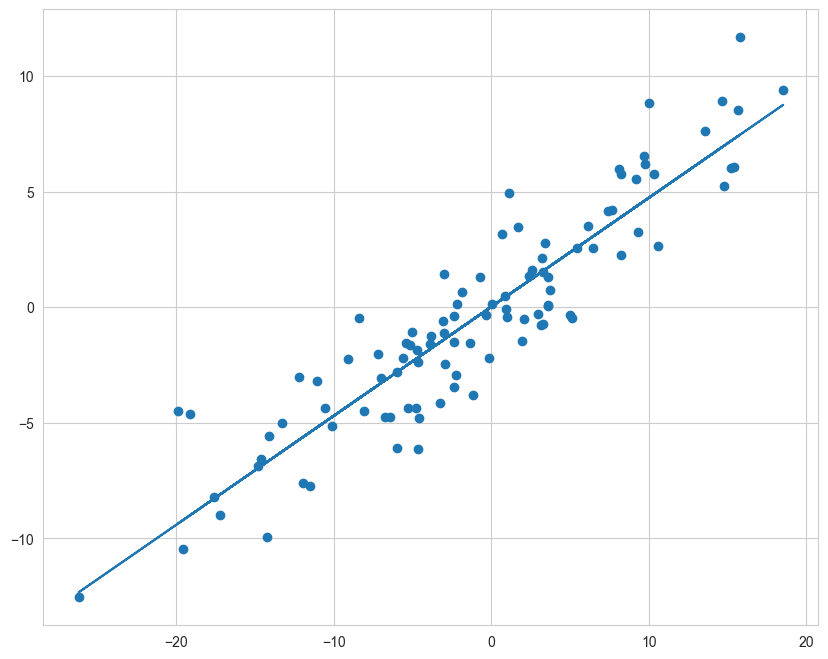

In [33]:
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

lr = LinearRegression()
lr.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, model_pred);
print("Coefficient Estimate: ", lr.coef_)

In [34]:
idx = rng.argmax()
y_gen[idx] = 200
idx = rng.argmin()
y_gen[idx] = -200

In [35]:
scaler = StandardScaler()
rng_normalized = scaler.fit_transform(rng.reshape(-1, 1))

Coefficient Estimate:  [13.60449019]


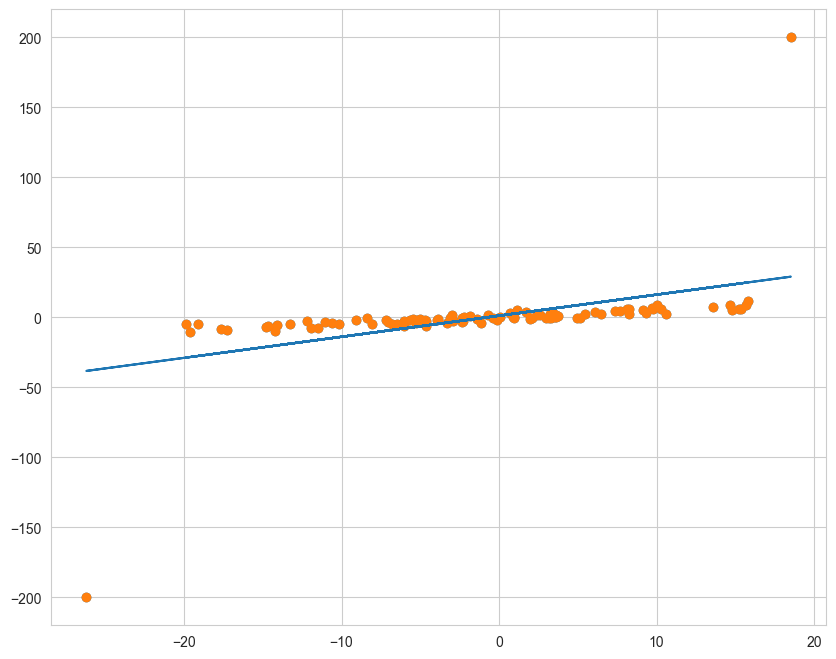

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(rng, y_gen)


o_lr = LinearRegression()
o_lr.fit(rng_normalized, y_gen)
o_model_pred = o_lr.predict(rng_normalized)

plt.scatter(rng, y_gen)
plt.plot(rng, o_model_pred)
print("Coefficient Estimate: ", o_lr.coef_)

## Ridge Regression

In [37]:
from sklearn.linear_model import Ridge

Coefficient Estimate:  [13.53680616]


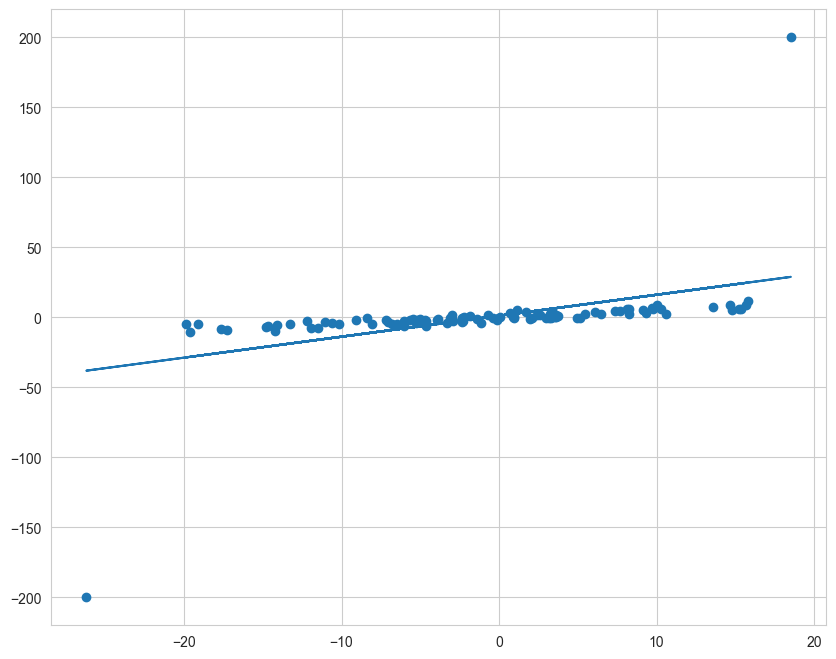

In [38]:
ridge_mod = Ridge(alpha=0.5)
ridge_mod.fit(rng_normalized, y_gen)
ridge_model_pred = ridge_mod.predict(rng_normalized)

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, ridge_model_pred);
print("Coefficient Estimate: ", ridge_mod.coef_)

## Lasso Regression

In [39]:
from sklearn.linear_model import Lasso

Coefficient Estimate:  [13.20449019]


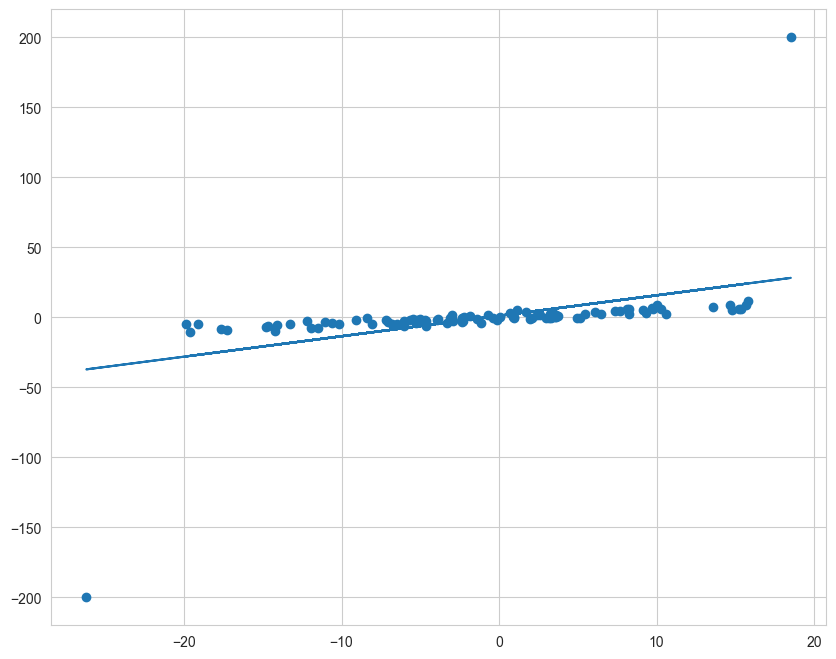

In [40]:
lasso_mod = Lasso(alpha=0.4)
lasso_mod.fit(rng_normalized, y_gen)
lasso_model_pred = lasso_mod.predict(rng_normalized)

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, lasso_model_pred);
print("Coefficient Estimate: ", lasso_mod.coef_)

## Elastic Net Regression

In [41]:
from sklearn.linear_model import ElasticNet

Coefficient Estimate:  [13.45989127]


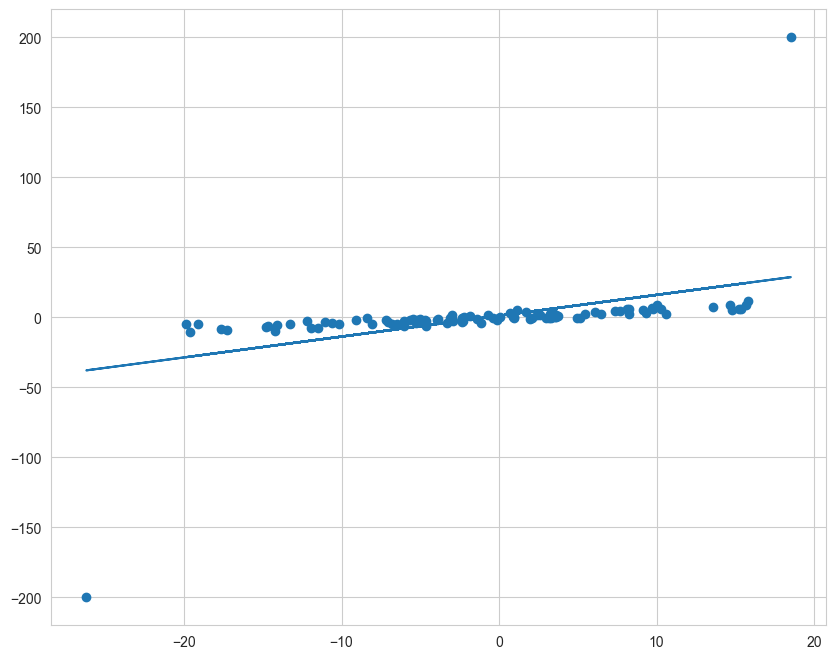

In [42]:
en_mod = ElasticNet(alpha=0.02)
en_mod.fit(rng_normalized, y_gen)
en_model_pred = en_mod.predict(rng_normalized)

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, en_model_pred);
print("Coefficient Estimate: ", en_mod.coef_)

***

# Tóm tắt

[Question in StackExchange](https://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge)

**Khi nào chúng ta nên sử dụng Lasso, Ridge hoặc Elastic Net?**

* **Ridge regression** không thể loại bỏ các hệ số; Cuối cùng, bạn sẽ bao gồm tất cả các hệ số trong mô hình hoặc không có hệ số nào trong số chúng.

* **LASSO** tự động thu gọn cả tham số và lựa chọn biến. 

* Nếu một số hiệp phương sai của bạn có mối tương quan cao, bạn có thể muốn xem **Elastic Net** thay vì LASSO.

# Tham khảo

1. [The Lasso Page](http://statweb.stanford.edu/~tibs/lasso.html)

2. [A simple explanation of the Lasso and Least Angle Regression](http://statweb.stanford.edu/~tibs/lasso/simple.html)

3. [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

***